Importações necessárias

In [1]:
from moviepy.editor import *
from moviepy.video.fx.all import fadein
from moviepy.video.fx.all import fadeout

import json
from random import choice

from PIL import Image
from PIL import ImageDraw
from PIL import ImageFilter

from uuid import uuid4 as uuid

import numpy as np

Carregando as *quotes*

In [2]:
quotes = []

with open("./quotes.json") as file:
    quotes = json.load(file)

quotes

[{'anime': 'Soul Eater',
  'character': 'Death the Kid',
  'quote': 'Oh sorry, my hand slipped.'},
 {'anime': 'Bleach', 'character': 'Abarai Renji', 'quote': 'Howl, Zabimaru.'},
 {'anime': 'Utsuro no Hako to Zero no Maria',
  'character': 'Hoshino Kazuki',
  'quote': 'If I abandoned you, I would be released from this pain. I would live on. But before long, I would end up seeking you again, for all my actions are ultimately devoted to you and only you. All I want is to stay on target and walk straight ahead—ignoring the losses and opposition, and even the results. That’s all I can do. Some people might call it an obsession, others may deem it a miracle—but to me and many others, my driving rationale couldn’t be more obvious and natural. There are people who understand this and there are people who don’t, and I simply happen to belong to the first group. The only difference is whether they have noticed that they don’t need boxes to make their wishes come true, and what it means to fulfil

Selecionando uma *quote* aleatória

In [3]:
quote = choice(quotes)

quote

{'anime': 'Soul Eater',
 'character': 'Death the Kid',
 'quote': 'Oh sorry, my hand slipped.'}

Clip da *quote*


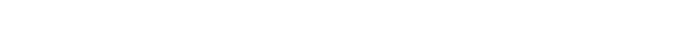

In [4]:
font_quote_clip = "./PlayfairDisplay-VariableFont_wght.ttf"

quote_clip = TextClip(
    f"\"{ quote["quote"] }\"", 
    color = "white", 
    fontsize = 25,
    method = "caption",
    size = (700, None),
    kerning = 1,
    font = font_quote_clip
)
quote_clip = quote_clip.set_position("center")

quote_clip.ipython_display()

Whose chip


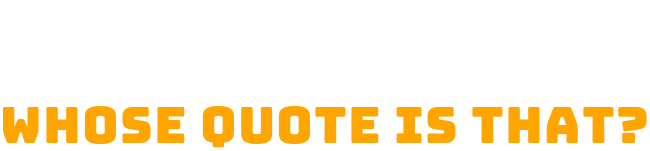

In [5]:
font_whose_chip = "./BungeeSpice-Regular.ttf"

whose_chip = TextClip(
    "Whose quote is that?",
    color = "orange",    
    fontsize = 50,
    font = font_whose_chip,
    kerning = 1
)

whose_chip = whose_chip.set_position("top")
whose_chip = whose_chip.margin(top = 100, opacity = 0)

whose_chip.ipython_display()

Fundo do vídeo



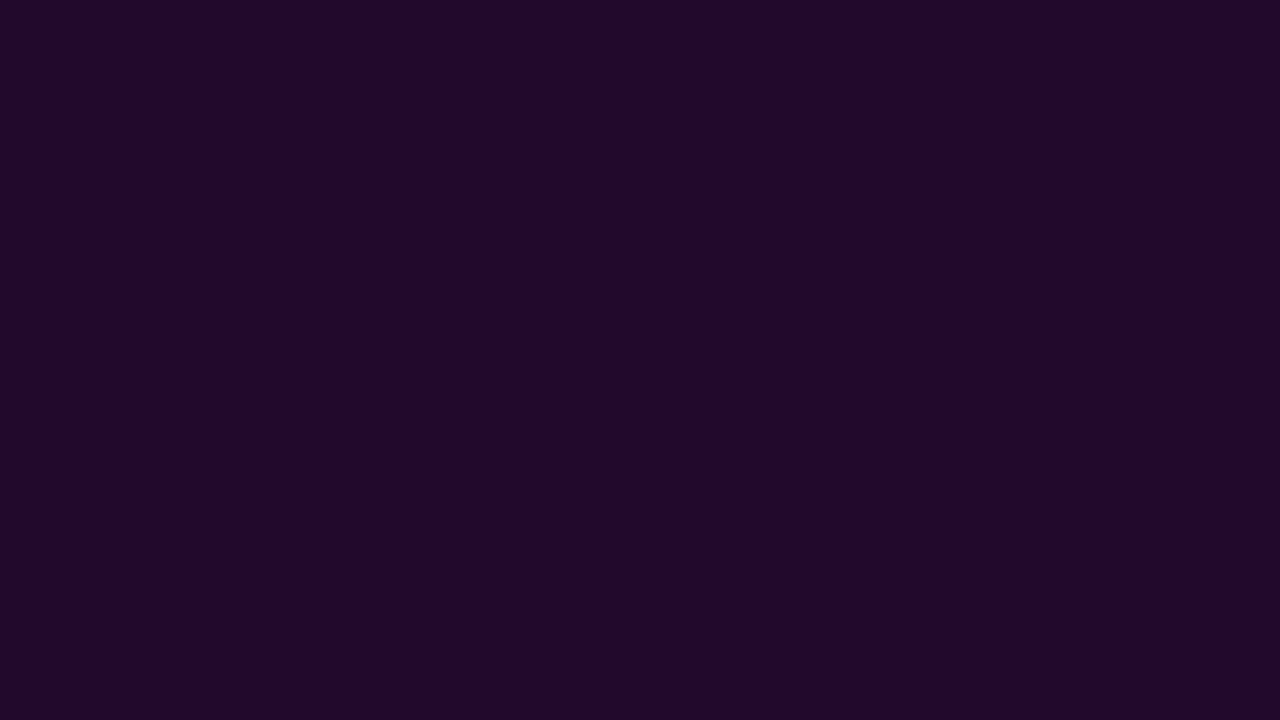

In [6]:
background = ColorClip((1280, 720), (34, 9, 44))

background.ipython_display()

Time bar

In [7]:
def create_timer_frame(t, duration):
    bar_width = 400

    frame = Image.new(mode = "RGBA", size = (bar_width, 25))

    drawer = ImageDraw.Draw(frame)

    progress = t / duration

    bar_progress = int(bar_width * progress)

    drawer.rounded_rectangle(
        xy = (0, 0, bar_width, 25), 
        radius = 19,
        outline = "white",
        width = 3        
    )

    drawer.rounded_rectangle(
        xy = (0, 0, bar_progress, 25), 
        radius = 19,
        fill = "yellow" ,
        outline = "white",
        width = 3
    )

    return frame

def create_timer(duration):

    frames = []
    
    fps = 60

    for t in range(duration * fps):
        frame = np.array(create_timer_frame(t, duration * fps))

        frames.append(frame)

    return ImageSequenceClip(frames, fps = fps, durations = duration * fps) 
    
timer_clip = create_timer(10)

timer_clip = timer_clip.margin(bottom = 75, opacity=0)
timer_clip = timer_clip.set_position("bottom")

timer_clip = fadein(timer_clip, 5)
timer_clip = fadeout(timer_clip, 2)

timer_clip.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Foto com blur do personagem

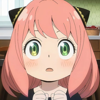

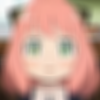

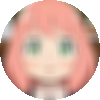


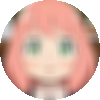

In [8]:
anime_photo_raw = Image.open("./anya.jpg")
anime_photo_raw = anime_photo_raw.resize((100, 100))

alpha = Image.new('L', anime_photo_raw.size,0)
draw = ImageDraw.Draw(alpha)

anime_photo_raw_width, anime_photo_raw_height = anime_photo_raw.size 
shape = [0, 0, anime_photo_raw_width - 1, anime_photo_raw_height - 1]

draw.pieslice(
    shape, 
    start = 0, 
    end = 360, 
    fill = 255,
)

anime_photo_blur = anime_photo_raw.filter(ImageFilter.BoxBlur(5))

np_anime_photo_raw = np.array(anime_photo_blur)
np_alpha = np.array(alpha)
np_anime_photo = np.dstack((anime_photo_blur, np_alpha))

anime_photo = Image.fromarray(np_anime_photo)

anime_photo_clip = ImageClip(np_anime_photo)

display(anime_photo_raw)
display(anime_photo_blur)
display(anime_photo)

anime_photo_clip.ipython_display()


Coluna dos animes

In [9]:
background_anime_colum = ColorClip((1280, 720), (0, 0, 0, 0))

anime_column = [
    background_anime_colum,
    anime_photo_clip.set_position((30, 100)),
    anime_photo_clip.set_position((30, 225)),
    anime_photo_clip.set_position((30, 350)),
    anime_photo_clip.set_position((30, 475)),
]

anime_clip_column = CompositeVideoClip(anime_column)
anime_clip_column = anime_clip_column.set_duration(10)

anime_clip_column.ipython_display(fps = 1)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Parte da *quote* 

In [10]:
quote_part = CompositeVideoClip([ background, anime_clip_column, whose_chip, quote_clip, timer_clip ])
quote_part = quote_part.set_duration(10)
quote_part = quote_part.set_fps(30)

quote_part.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


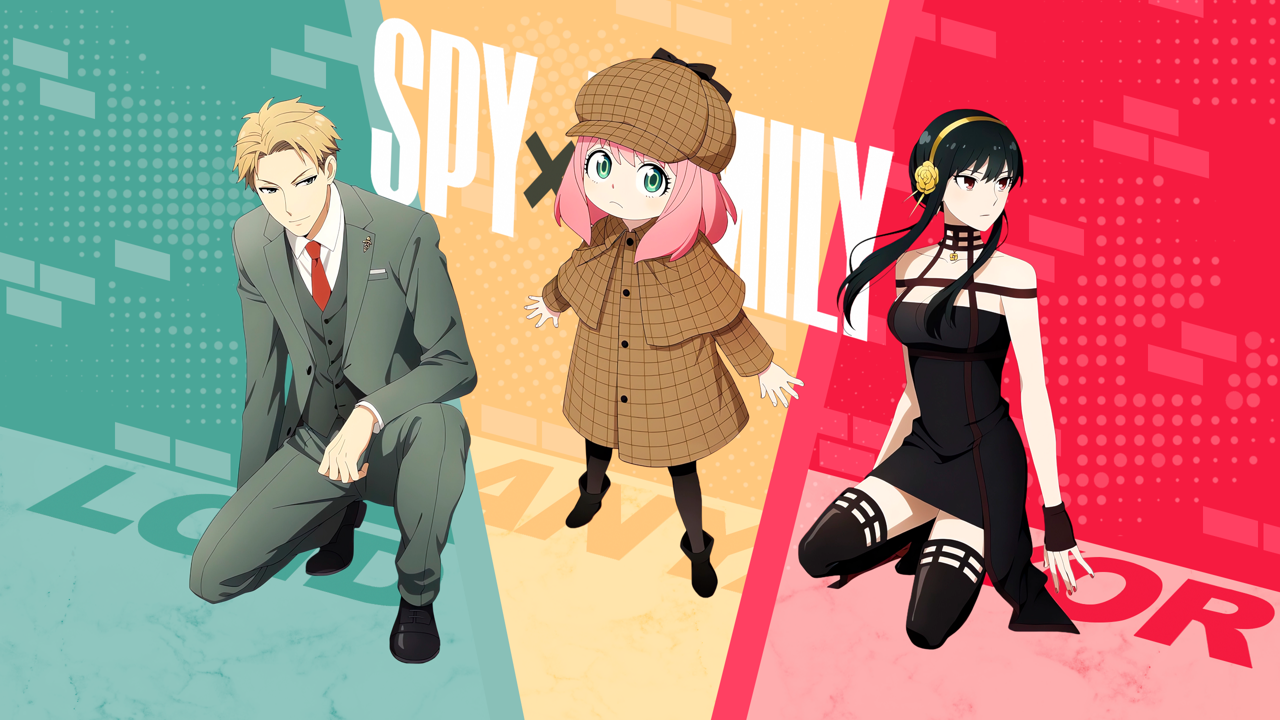


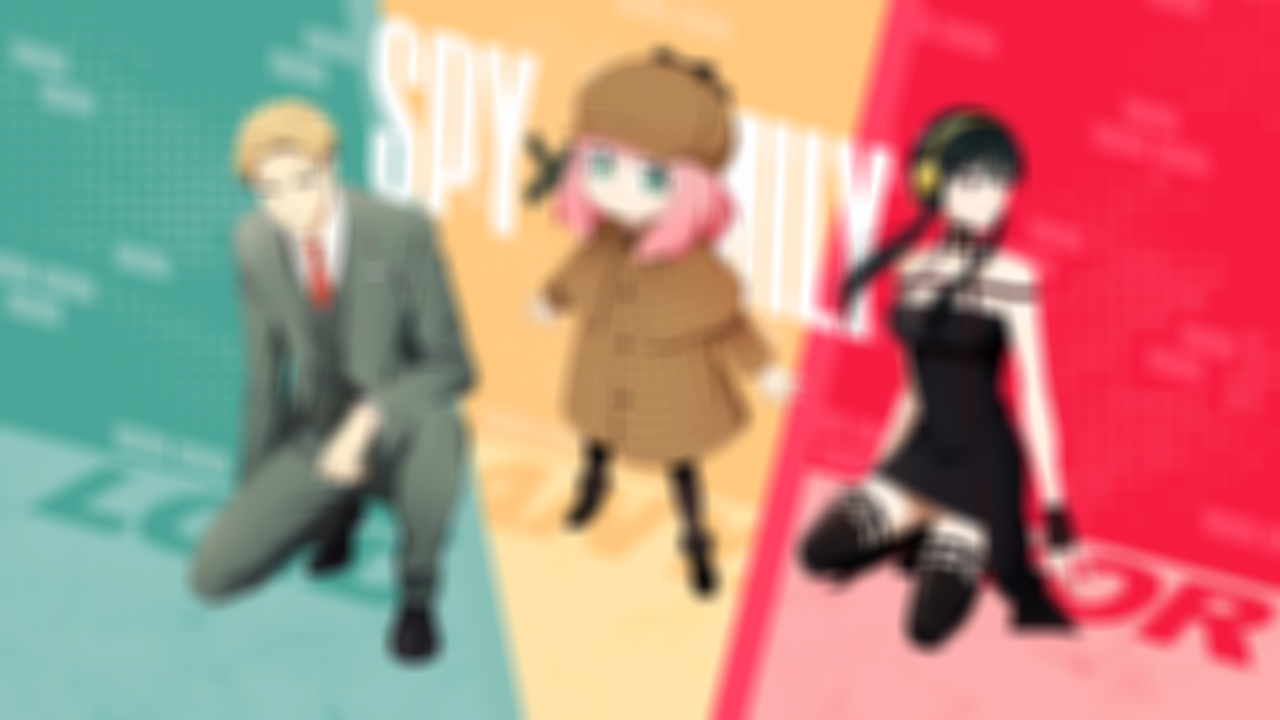

In [11]:
anime_backgroud_raw = Image.open("./anime_background.png")
anime_backgroud_raw = anime_backgroud_raw.resize((1280, 720))

display(anime_backgroud_raw)

anime_backgroud = anime_backgroud_raw.filter(ImageFilter.BoxBlur(10))

anime_backgroud = ImageClip(np.array(anime_backgroud))

anime_backgroud.ipython_display()



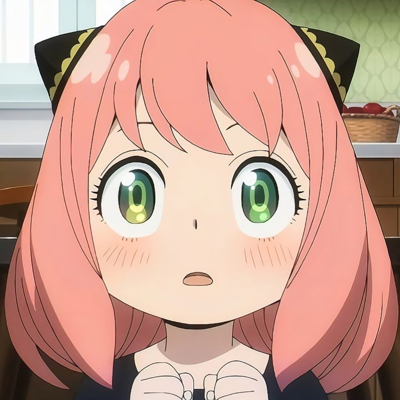

In [12]:
anime_photo_answer = Image.open("./anya.jpg")
anime_photo_answer = anime_photo_answer.resize((400, 400))

anime_photo_answer = ImageClip(np.array(anime_photo_answer))

anime_photo_answer = anime_photo_answer.set_position("center")

anime_photo_answer.ipython_display()


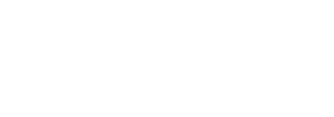

In [13]:
anime_char_name = TextClip(
    "Anya Forger",
    color = "white",
    fontsize = 50,
    kerning = 1
)

anime_char_name = anime_char_name.margin(bottom = 75, opacity=0)
anime_char_name = anime_char_name.set_position("bottom")

anime_char_name.ipython_display()

In [14]:
anime_answer = CompositeVideoClip([ anime_backgroud, anime_photo_answer, anime_char_name ])
anime_answer = anime_answer.set_duration(5)
anime_answer = anime_answer.set_fps(1)
anime_answer.ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [15]:
background_audio = AudioFileClip("./Path to Follow.mp3")
background_audio = background_audio.set_duration(15)

background_audio.ipython_display()

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.


In [16]:
final_video = concatenate_videoclips([ quote_part, anime_answer ])
final_video = final_video.set_audio(background_audio)
final_video = final_video.write_videofile("quote.mp4")


Moviepy - Building video quote.mp4.
MoviePy - Writing audio in quoteTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video quote.mp4



Moviepy - Done !
Moviepy - video ready quote.mp4


None